## Used Cars Dataset

**Importing Necessary Library**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [48]:
df=pd.read_csv("vehicles.csv")

In [49]:
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [50]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

Initial Data Cleaning and Feature Selection

In [51]:
columns_to_drop = [
    'id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county',
    'lat', 'long', 'size', 'state'
]
df.drop(columns=columns_to_drop, inplace=True)

In [52]:
#Data Set after Filtering the columns
df.tail(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,posting_date
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,2021-04-04T03:21:31-0600
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,2021-04-04T03:21:29-0600
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,2021-04-04T03:21:17-0600
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,2021-04-04T03:21:11-0600
426879,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,rwd,coupe,NaN,2021-04-04T03:21:07-0600


Descriptive Analysis

In [53]:
df.shape

(426880, 15)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  posting_date  426812 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 48.9+ MB


In [55]:
df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


**Data Cleaning**

In [56]:
df.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
posting_date        68
dtype: int64

In [57]:
# fill numeric columns with mean
numeric_columns = ['year', 'odometer']
for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

In [58]:
# fill missing Categorical values with the most frequent value (mode)
def fill_with_mode(column):
    if column.isna().all():
        # If the entire column is NaN, fill with a default value (e.g., 'Unknown')
        return column.fillna('Unknown')
    else:
        # Otherwise, fill with the mode (most frequent value)
        mode_value = column.mode()[0]
        return column.fillna(mode_value)

# List of columns to clean
columns_to_clean = categorical_columns = ['manufacturer', 'model', 'condition', 'cylinders','title_status', 'fuel','transmission', 'drive', 'type', 'paint_color']

# Loop through each column and handle missing values
for column in columns_to_clean:
    # Check if the column exists in the DataFrame to avoid errors
    if column in df.columns:
        #df.method({col: value}, inplace=True) or 
        df[column].fillna(fill_with_mode(df[column]), inplace=True)

C:\Users\konda\AppData\Local\Temp\ipykernel_20104\1820717625.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(fill_with_mode(df[column]), inplace=True)


In [59]:
df.isnull().sum()

region           0
price            0
year             0
manufacturer     0
model            0
condition        0
cylinders        0
fuel             0
odometer         0
title_status     0
transmission     0
drive            0
type             0
paint_color      0
posting_date    68
dtype: int64

In [60]:
df['posting_date'] = df['posting_date'].fillna('Unknown')

In [61]:
# check duplicates
df.duplicated().sum()

np.int64(39)

In [62]:
# check data type
df.dtypes

region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
posting_date     object
dtype: object

In [63]:
# change data_added column format
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')


C:\Users\konda\AppData\Local\Temp\ipykernel_20104\483976205.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
C:\Users\konda\AppData\Local\Temp\ipykernel_20104\483976205.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')


In [64]:
df.head()


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,posting_date
0,prescott,6000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,NaT
1,fayetteville,11900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,NaT
2,florida keys,21000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,NaT
3,worcester / central MA,1500,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,NaT
4,greensboro,4900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,NaT


In [65]:
# Replacing the values of cylinders with corresponding numerical digits

df['cylinders'].replace(to_replace=['3 cylinders','4 cylinders','5 cylinders','6 cylinders','8 cylinders','10 cylinders','12 cylinders'
,'other'],value=[3,4,5,6,8,10,12,np.nan],inplace=True)

C:\Users\konda\AppData\Local\Temp\ipykernel_20104\4271427340.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinders'].replace(to_replace=['3 cylinders','4 cylinders','5 cylinders','6 cylinders','8 cylinders','10 cylinders','12 cylinders'
C:\Users\konda\AppData\Local\Temp\ipykernel_20104\4271427340.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior

## EDA

What is the most popular car type?

In [66]:
df['type'].value_counts()

type
sedan          179914
SUV             77284
pickup          43510
truck           35279
other           22110
coupe           19204
hatchback       16598
wagon           10751
van              8548
convertible      7731
mini-van         4825
offroad           609
bus               517
Name: count, dtype: int64

We found sedan is the highest one.

C:\Users\konda\AppData\Local\Temp\ipykernel_20104\445204184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=car_type_counts.values, y=car_type_counts.index, palette='viridis')


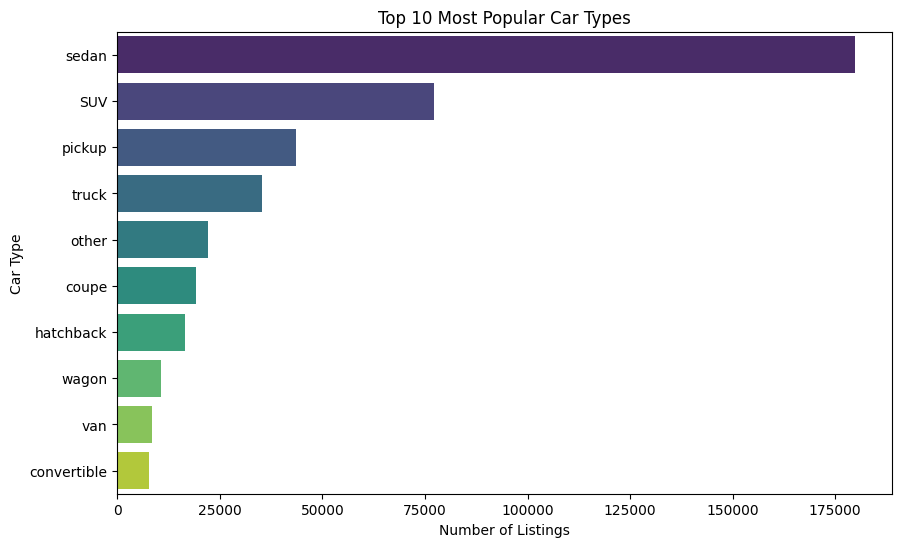

In [67]:
# Most Popular Car Type
car_type_counts = df['type'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=car_type_counts.values, y=car_type_counts.index, palette='viridis')
plt.title('Top 10 Most Popular Car Types')
plt.xlabel('Number of Listings')
plt.ylabel('Car Type')
plt.show()

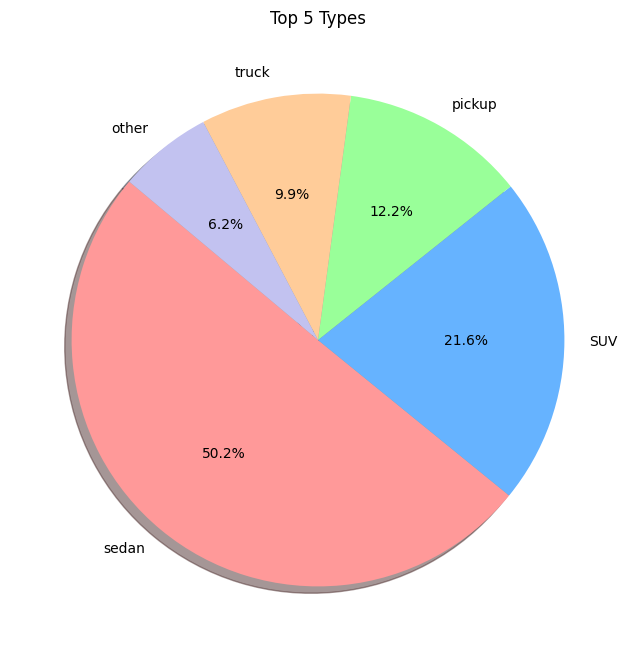

In [68]:
# Plot the top 5 types
df['type'].value_counts().head(5).plot(
    kind='pie', 
    autopct='%1.1f%%', 
    figsize=(8, 8), 
    startangle=140, 
    shadow=True, 
    labels=df['type'].value_counts().head(5).index,  # Use specific labels
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  # Optional custom colors
)
plt.title('Top 5 Types')
plt.ylabel('')  # Remove the y-axis label for better aesthetics
plt.show()


What is the distribution of cars according to title status?¶


C:\Users\konda\AppData\Local\Temp\ipykernel_20104\2985649471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts.index, y=title_counts.values, palette='magma')


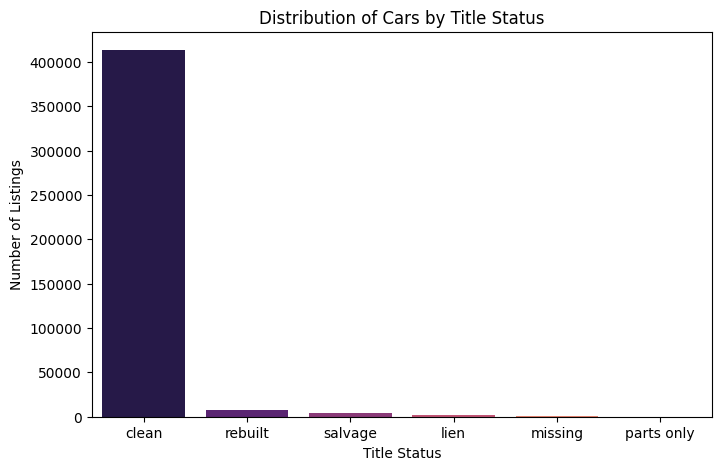

In [69]:
# Distribution of Cars According to Title Status
title_counts = df['title_status'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=title_counts.index, y=title_counts.values, palette='magma')
plt.title('Distribution of Cars by Title Status')
plt.xlabel('Title Status')
plt.ylabel('Number of Listings')
plt.show()


What is the trend of data over time?

C:\Users\konda\AppData\Local\Temp\ipykernel_20104\2170311644.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['posting_date'].dt.to_period('M')


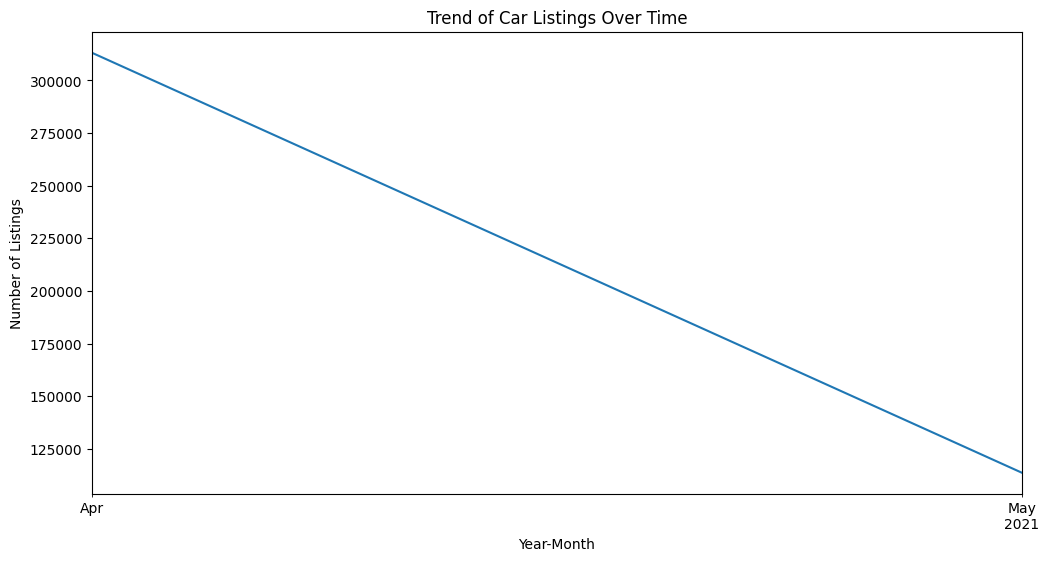

In [70]:
# Trend of Data Over Time
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)

# Extract year and month
df['year_month'] = df['posting_date'].dt.to_period('M')

# Calculate trend of car listings over time
trend = df['year_month'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
trend.plot()
plt.title('Trend of Car Listings Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

How does the price change over the years

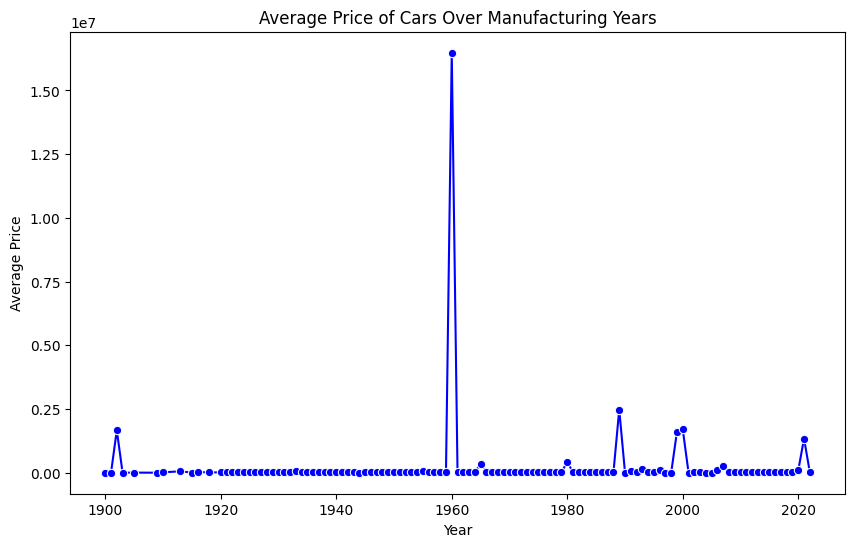

In [72]:
# Price Change Over Years
price_by_year = df.groupby('year')['price'].mean().dropna()
plt.figure(figsize=(10, 6))
sns.lineplot(x=price_by_year.index, y=price_by_year.values, marker='o', color='b')
plt.title('Average Price of Cars Over Manufacturing Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


What is the most popular condition?

In [73]:
df['condition'].value_counts()


condition
good         295560
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

we can see that the highest is good.



C:\Users\konda\AppData\Local\Temp\ipykernel_20104\1923491262.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='coolwarm')


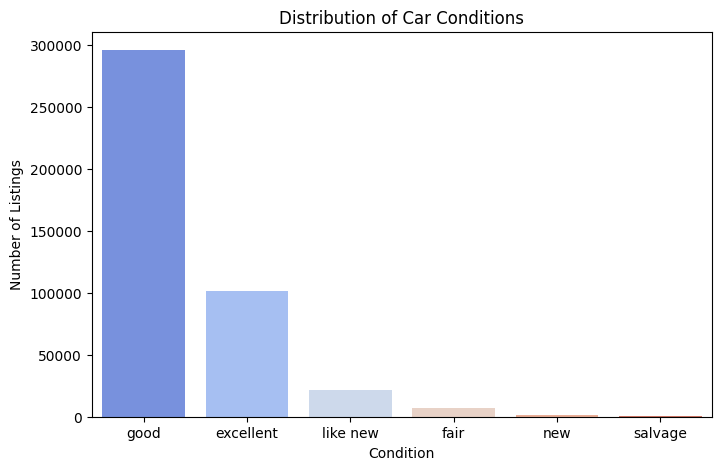

In [74]:
# Most Popular Condition
condition_counts = df['condition'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='coolwarm')
plt.title('Distribution of Car Conditions')
plt.xlabel('Condition')
plt.ylabel('Number of Listings')
plt.show()

What is the relation between price and mileage?¶

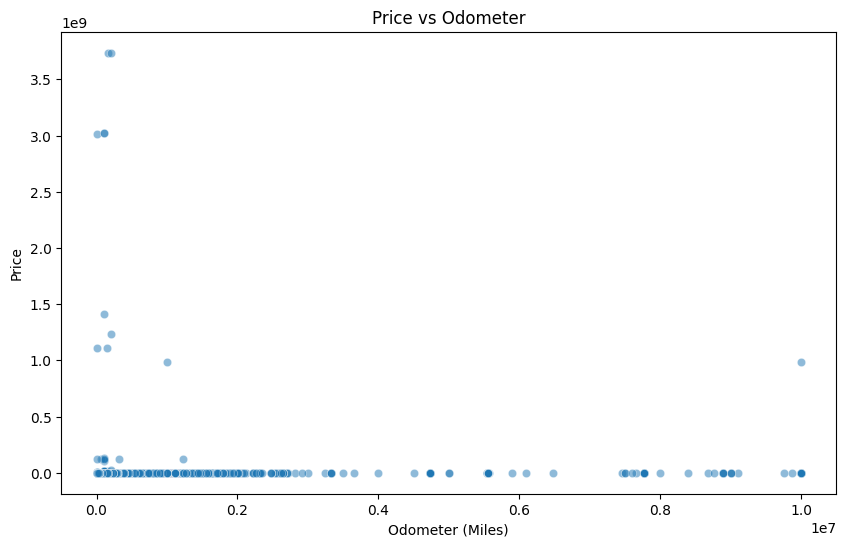

In [75]:
# Price vs Odometer (Mileage)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=df, alpha=0.5)
plt.title('Price vs Odometer')
plt.xlabel('Odometer (Miles)')
plt.ylabel('Price')
plt.show()

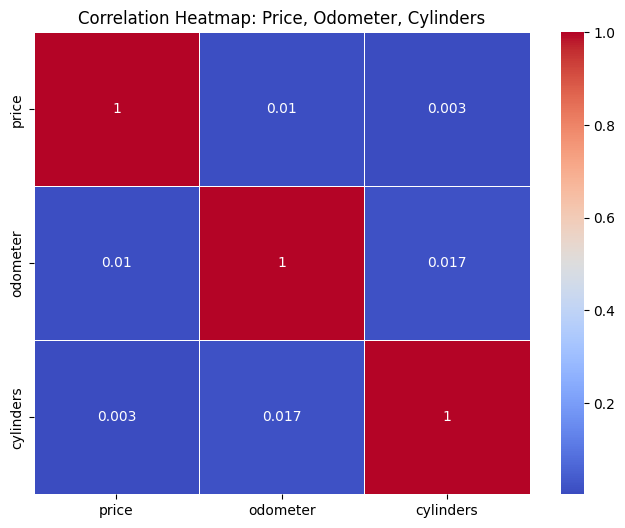

In [76]:
corr = df[['price', 'odometer', 'cylinders']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Price, Odometer, Cylinders')
plt.show()

How is price affected by fuel type?

C:\Users\konda\AppData\Local\Temp\ipykernel_20104\1889617826.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_price.index, y=fuel_price.values, palette='pastel')


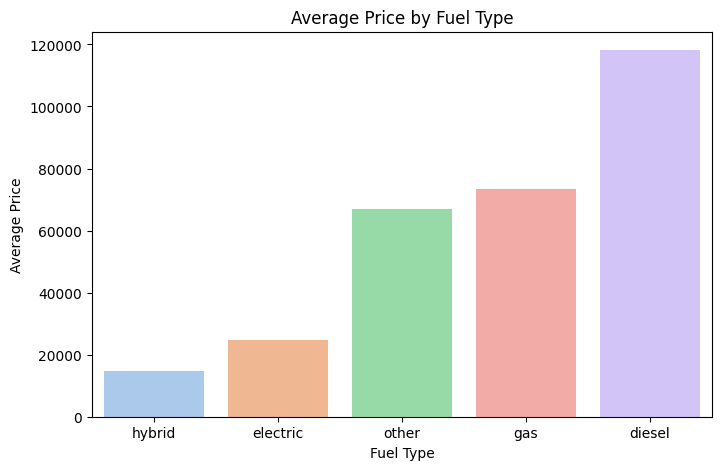

In [77]:
# Price Affected by Fuel Type
fuel_price = df.groupby('fuel')['price'].mean().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=fuel_price.index, y=fuel_price.values, palette='pastel')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()


What is the average price based on manufacturer?

C:\Users\konda\AppData\Local\Temp\ipykernel_20104\1437088833.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=manufacturer_price.values, y=manufacturer_price.index, palette='cubehelix')


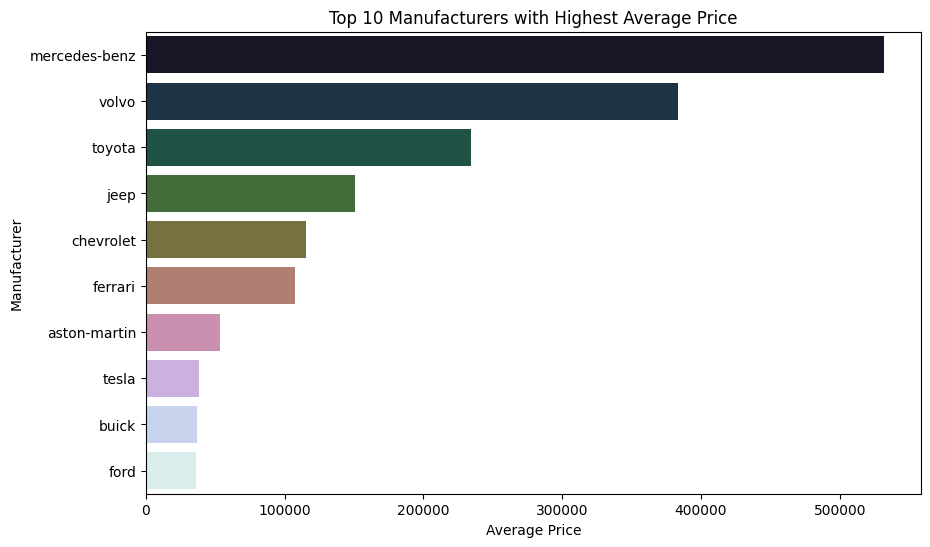

In [78]:
# Average Price by Manufacturer
manufacturer_price = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=manufacturer_price.values, y=manufacturer_price.index, palette='cubehelix')
plt.title('Top 10 Manufacturers with Highest Average Price')
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')
plt.show()

What is the distribution of cars based on cylinders?

In [79]:

df['cylinders'].value_counts().sort_values()

cylinders
12.0       209
3.0        655
10.0      1455
5.0       1712
8.0      72062
4.0      77642
6.0     271847
Name: count, dtype: int64

In [80]:
cylinder_types = df['cylinders'].dropna().unique() 
cylinder_types

array([ 6.,  8.,  4.,  5.,  3., 10., 12.])

C:\Users\konda\AppData\Local\Temp\ipykernel_20104\1096762494.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\konda\AppData\Local\Temp\ipykernel_20104\1096762494.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\konda\AppData\Local\Temp\ipykernel_20104\1096762494.py:4: U

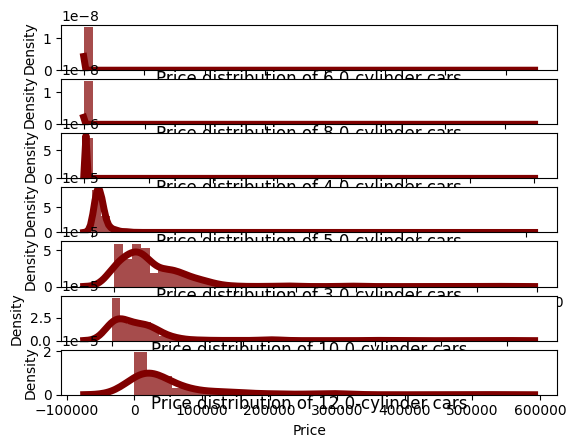

In [81]:
# Loop through each cylinder type
for i, cyl in enumerate(cylinder_types, 1):  # Loop with index for subplot positioning
    plt.subplot(len(cylinder_types), 1, i)  # Create a subplot for each cylinder type
    sns.distplot(
        df[df['cylinders'] == cyl]['price'], 
        color='maroon', 
        hist_kws={'alpha': 0.7}, 
        kde_kws={'lw': 5}
    )
    plt.title(f'Price distribution of {cyl}-cylinder cars', y=-0.5)
    plt.xlabel('Price')
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\konda\AppData\Local\Temp\ipykernel_20104\1879989369.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cylinder_counts.index, y=cylinder_counts.values, palette='viridis')


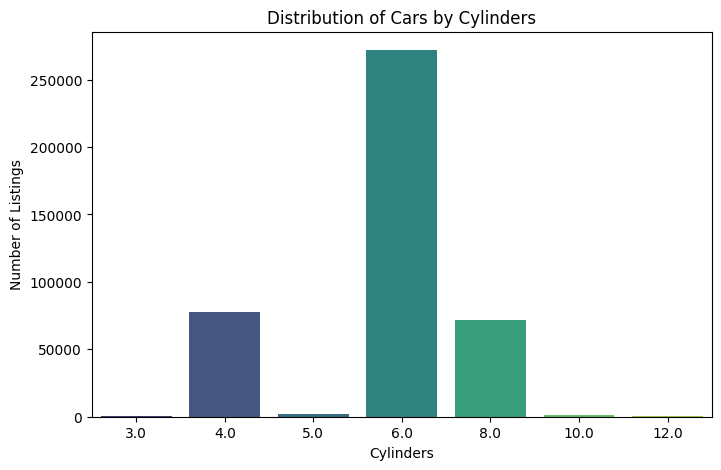

In [82]:
## Distribution of Cars Based on Cylinders
cylinder_counts = df['cylinders'].value_counts().dropna()
plt.figure(figsize=(8, 5))
sns.barplot(x=cylinder_counts.index, y=cylinder_counts.values, palette='viridis')
plt.title('Distribution of Cars by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Number of Listings')
plt.show()
